In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
from scipy.stats import linregress, pearsonr

In [3]:
csv = "clean.csv"

base_df = pd.read_csv(csv)
base_df

,Id,OwnerCity,OwnerState,PropertyLocationStreet1,PropertyCity,PropertyZip,StateParcelId,ParcelSize,ValueofHome,YearBuilt,...,FireID,DistancetoFireDepartment,DistancetoSinkhole,SinkholeLatitude,SinkholeLongitude,LocationWindSpeed,WindborneDebrisRegion,Terrain,FloodZone,FloodZoneRiskLevel
0,12009f31026acc440,PINEHURST,NC,5833 NEWBURY CIR,MELBOURNE,32940,C15-000-035-4368-3,10890.0,360350.0,2001.0,...,NaN,1.67,19.32,28.46383,-80.79177,120.0,True,B,X:100,NaN
1,120112bfc77a87376,STAFFORD,VA,12723 SW 49 CT,MIRAMAR,33027,C16-000-107-5040-4,2328.0,228680.0,2003.0,...,645.0,2.37,5.11,25.98582,-80.23586,140.0,True,HVHZ,X:100,NaN
2,12081776a04b281f4,RICHMOND,VA,6470 SEAGULL DR UNIT 307,BRADENTON,34210,C51-000-535-8660-8,44.0,135000.0,1980.0,...,NaN,0.96,1.93,27.41706,-82.56742,130.0,True,C,A:100,NaN
3,12103fabafeea9fb7,ARLINGTON,VA,1012 NORTH SHORE DR NE # 12,SAINT PETERSBURG,33701,C62-000-778-7949-2,NaN,87660.0,1959.0,...,855.0,1.08,1.00,27.77333,-82.64000,123.0,True,C,"X500:40, A:30, X:30",NaN
4,120213b0f5f17e3d1,ROCK HILL,SC,5550 HERON POINT DR,NAPLES,34108,C21-000-189-4508-9,NaN,663090.0,1991.0,...,50.0,1.37,11.43,26.27444,-81.63916,131.0,True,C,A:100,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,12086e1ddd12521cd,BLUFFTON,SC,5765 NW 99 CT,DORAL,33178,C23-000-278-7237-3,3473.0,329160.0,1993.0,...,NaN,0.27,13.46,25.98582,-80.23586,146.0,True,HVHZ,X:100,NaN
224,120861813f1294d56,RICHMOND,VA,7805 NOREMAC AVE,MIAMI BEACH,33141,C23-000-207-1780-7,9000.0,924061.0,1941.0,...,627.0,0.71,7.25,25.96256,-80.16641,146.0,True,HVHZ,A:100,NaN
225,12089ed366ee68b8e,MARS HILL,NC,246 S FLETCHER AVE,FERNANDINA BEACH,32034,C55-000-585-3872-9,6650.0,274291.0,1929.0,...,359.0,1.23,6.33,30.67020,-81.53824,120.0,True,C,X:100,NaN
226,1211544028709F1DD,OAKTON,VA,171 VISTA HERMOSA CIR 21-B,SARASOTA,34242,C68-000-867-0448-3,NaN,267400.0,1971.0,...,NaN,1.13,2.29,27.27514,-82.55399,130.0,True,B,A:100,NaN


In [4]:
house_df = base_df[["Id", "ValueofHome", "OwnerCity", "OwnerState", "PropertyLocationStreet1", "PropertyCity",
                    "PropertyZip", "YearBuilt", "TypeOfResidence"]]
house_df

,Id,ValueofHome,OwnerCity,OwnerState,PropertyLocationStreet1,PropertyCity,PropertyZip,YearBuilt,TypeOfResidence
0,12009f31026acc440,360350.0,PINEHURST,NC,5833 NEWBURY CIR,MELBOURNE,32940,2001.0,SINGLE FAMILY
1,120112bfc77a87376,228680.0,STAFFORD,VA,12723 SW 49 CT,MIRAMAR,33027,2003.0,ATTACHED RESIDENTIAL
2,12081776a04b281f4,135000.0,RICHMOND,VA,6470 SEAGULL DR UNIT 307,BRADENTON,34210,1980.0,CONDO STACKED
3,12103fabafeea9fb7,87660.0,ARLINGTON,VA,1012 NORTH SHORE DR NE # 12,SAINT PETERSBURG,33701,1959.0,CONDO STACKED
4,120213b0f5f17e3d1,663090.0,ROCK HILL,SC,5550 HERON POINT DR,NAPLES,34108,1991.0,CONDO STACKED
...,...,...,...,...,...,...,...,...,...
223,12086e1ddd12521cd,329160.0,BLUFFTON,SC,5765 NW 99 CT,DORAL,33178,1993.0,SINGLE FAMILY
224,120861813f1294d56,924061.0,RICHMOND,VA,7805 NOREMAC AVE,MIAMI BEACH,33141,1941.0,SINGLE FAMILY
225,12089ed366ee68b8e,274291.0,MARS HILL,NC,246 S FLETCHER AVE,FERNANDINA BEACH,32034,1929.0,SINGLE FAMILY
226,1211544028709F1DD,267400.0,OAKTON,VA,171 VISTA HERMOSA CIR 21-B,SARASOTA,34242,1971.0,CONDO ROW


In [5]:
house_type = house_df["TypeOfResidence"].value_counts()
house_type_df = pd.DataFrame(house_type)
house_type_df

,TypeOfResidence
SINGLE FAMILY,161
CONDO STACKED,39
ATTACHED RESIDENTIAL,16
CONDO ROW,8
CONDO UNIT,4


In [6]:
house_age = 2020 - house_df["YearBuilt"]
house_age

0      19.0
1      17.0
2      40.0
3      61.0
4      29.0
       ... 
223    27.0
224    79.0
225    91.0
226    49.0
227    53.0
Name: YearBuilt, Length: 228, dtype: float64

In [91]:
house_df["House Age"] = house_age
house_df["ValueofHome"].max()

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1233088.0

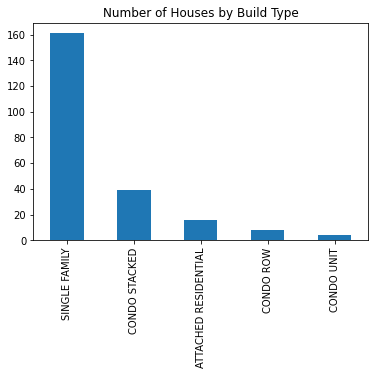

In [8]:
#bar chart of build types
house_type.plot(kind="bar", x="TypeOfResidence", y=house_type)
plt.title("Number of Houses by Build Type")
plt.savefig("houses by build type")

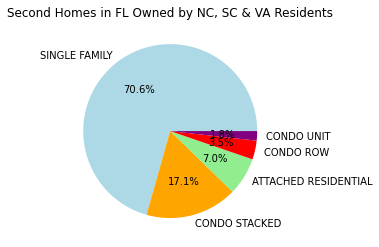

In [138]:
# # house_type_df.rename(columns={"TypeOfResidence": "# of Homes"})
colors=["lightblue", "orange", "lightgreen", "red", "purple"]
labels=house_type_df["TypeOfResidence"].index
plt.pie(house_type, labels=labels, autopct="%1.1f%%", colors=colors)
plt.title("Second Homes in FL Owned by NC, SC & VA Residents")
plt.tight_layout
plt.savefig("house type pie chart")

Text(0, 0.5, 'Value (in Millions)')

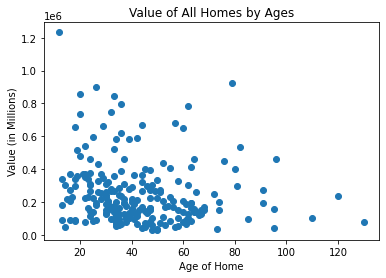

In [10]:
#scatter plot of value of houses
hx = house_df["House Age"]
hy = house_df["ValueofHome"]
plt.scatter(hx, hy)

plt.title("Value of All Homes by Ages")
plt.xlabel("Age of Home")
plt.ylabel("Value (in Millions)")

In [11]:
np.polyfit(hx, hy, 1)

(slope, intercept, rvalue, pvalue, stderr) = linregress(hx, hy)
slope, intercept

house_predict = hx*slope + intercept
house_predict

line_eq = f"y = {round(slope)}x + {round(intercept)}"
r_val = pearsonr(hx, hy)[0]
r_sq =  r_val ** 2

Text(80, 1050000, 'R-squared: 0.022330912537027927')

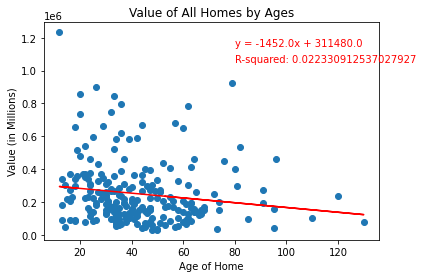

In [12]:
hx = house_df["House Age"]
hy = house_df["ValueofHome"]
plt.scatter(hx, hy)
plt.plot(hx, house_predict, color="red")

plt.title("Value of All Homes by Ages")
plt.xlabel("Age of Home")
plt.ylabel("Value (in Millions)")
plt.tight_layout

plt.annotate(line_eq, (80,1150000), color="red")
plt.annotate(f"R-squared: {r_sq}", (80,1050000), color="red")

Text(0, 0.5, 'Value (in Millions)')

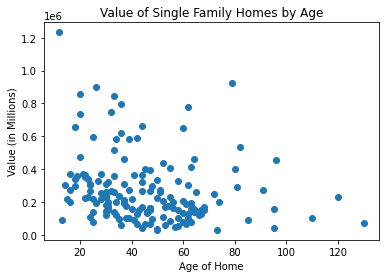

In [13]:
#scatter plot of value of houses by build type: Single Family
single_fam = house_df.loc[house_df["TypeOfResidence"]=="SINGLE FAMILY"]
# single_fam.plot(kind="scatter", x="HouseAge", y="ValueofHome")
# plt.xlim(0, 150)
# plt.ylim(0, 1400000)

sf_x = single_fam["House Age"]
sf_y = single_fam["ValueofHome"]
plt.scatter(sf_x, sf_y)
plt.title("Value of Single Family Homes by Age")
plt.xlabel("Age of Home")
plt.ylabel("Value (in Millions)")
# house_df.plot(kind="scatter",x="TypeOfResidence", y="ValueofHome")
# tick_locations = house_df["TypeOfResidence"]
# plt.xticks(tick_locations, rotation="vertical")

Text(0, 0.5, 'Value')

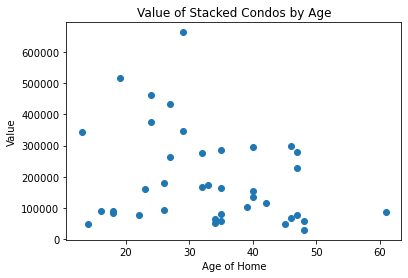

In [14]:
#scatter plot of value of houses by age: build type = Stacked Condo
condo_stacked = house_df.loc[house_df["TypeOfResidence"]=="CONDO STACKED"]
condo_stacked
# condo_stacked.plot(kind="scatter", x="HouseAge", y="ValueofHome")
# plt.title("Value of Stacked Condos by Age")
# plt.xlabel=("Age of Home")
# plt.ylabel=("Value")

cs_x = condo_stacked["House Age"]
cs_y = condo_stacked["ValueofHome"]
plt.scatter(cs_x, cs_y)
plt.title("Value of Stacked Condos by Age")
plt.xlabel("Age of Home")
plt.ylabel("Value")

Text(0, 0.5, 'Value')

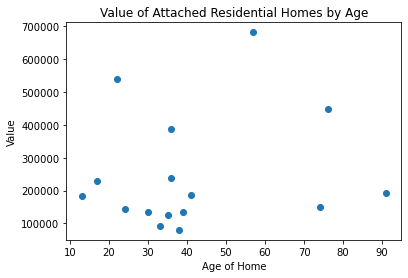

In [15]:
#scatter plot of value of houses by age: build type = Attached Residential
attached_res = house_df.loc[house_df["TypeOfResidence"]=="ATTACHED RESIDENTIAL"]

ar_x = attached_res["House Age"]
ar_y = attached_res["ValueofHome"]
plt.scatter(ar_x, ar_y)

plt.title("Value of Attached Residential Homes by Age")
plt.xlabel("Age of Home")
plt.ylabel("Value")

Text(0, 0.5, 'Value')

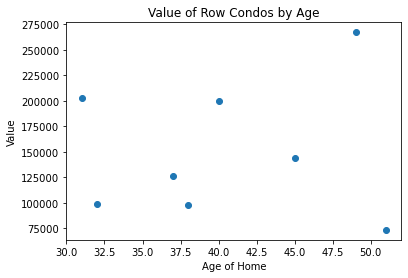

In [16]:
# #scatter plot of value of houses by age: build type = Row Condo
condo_row = house_df.loc[house_df["TypeOfResidence"]=="CONDO ROW"]

cr_x = condo_row["House Age"]
cr_y = condo_row["ValueofHome"]
plt.scatter(cr_x, cr_y)

plt.title("Value of Row Condos by Age")
plt.xlabel("Age of Home")
plt.ylabel("Value")

Text(0, 0.5, 'Value')

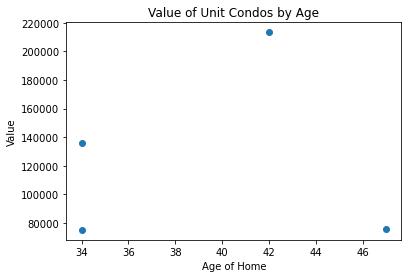

In [17]:
#scatter plot of value of houses by age: build type = Unit Condo
unit_condo = house_df.loc[house_df["TypeOfResidence"]=="CONDO UNIT"]

uc_x = unit_condo["House Age"]
uc_y = unit_condo["ValueofHome"]
plt.scatter(uc_x, uc_y)

plt.title("Value of Unit Condos by Age")
plt.xlabel("Age of Home")
plt.ylabel("Value")

In [18]:
year = house_df["YearBuilt"].value_counts()
year

1973.0    11
1990.0     8
1986.0     7
1985.0     7
1987.0     7
          ..
1944.0     1
1900.0     1
1940.0     1
1924.0     1
1971.0     1
Name: YearBuilt, Length: 71, dtype: int64

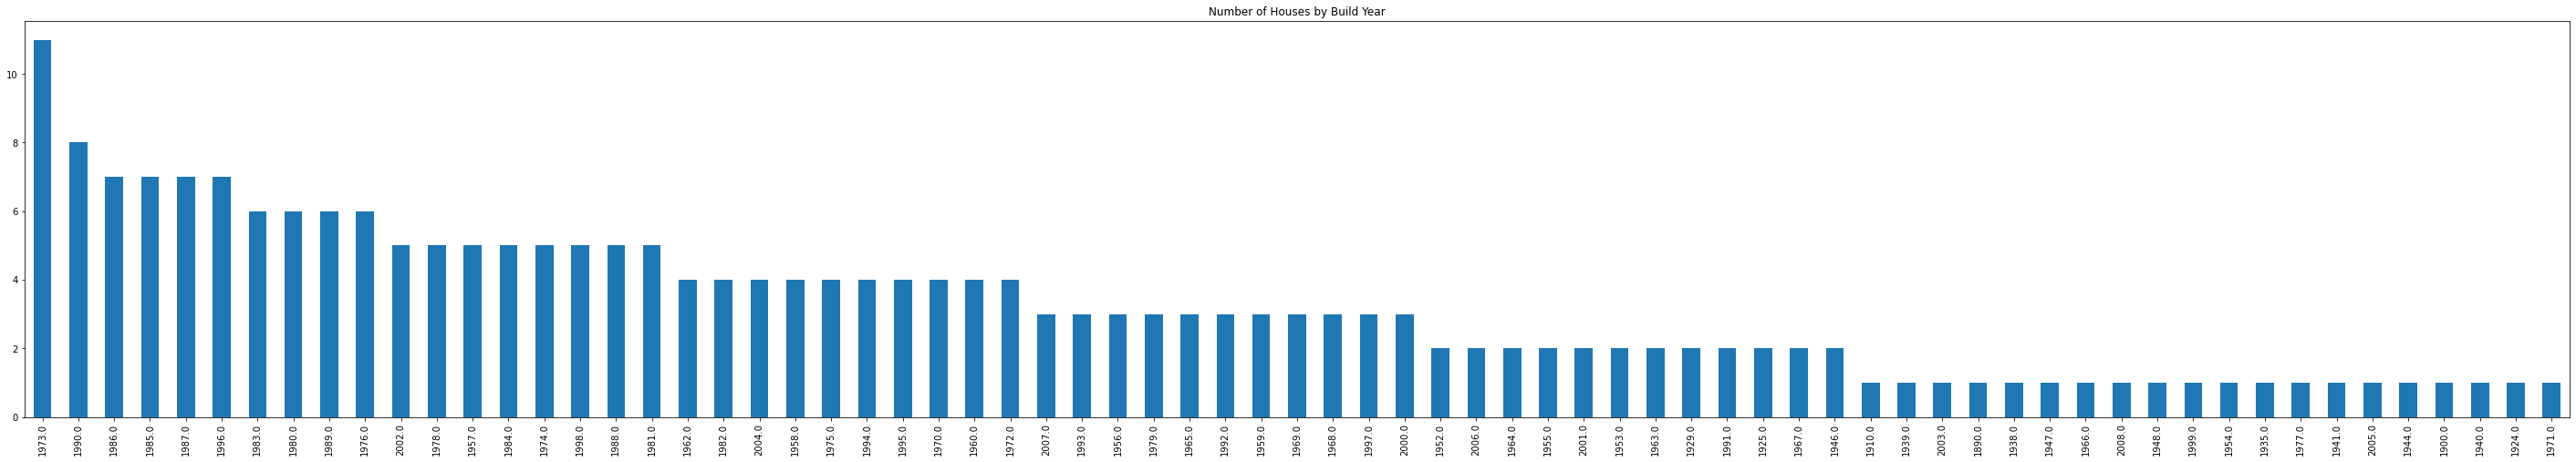

In [19]:
plt.figure(figsize=(50, 8))
year.plot(kind="bar", x="YearBuilt", y=year)
plt.title("Number of Houses by Build Year")
plt.tight_layout
plt.savefig("house by build year")

In [20]:
#boxplot of values of house separated by type
value_by_type = house_df.groupby("TypeOfResidence")["ValueofHome"]
type_df = pd.DataFrame(value_by_type.describe())

quartiles = house_df["ValueofHome"].quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile is {lowerq}, the upper quartile is {upperq}, and the inter-quartile range is {iqr}.")

The lower quartile is 123598.5, the upper quartile is 310639.25, and the inter-quartile range is 187040.75.


In [21]:
#determine outliers by upper and lower bounds
lbound = quartiles[0.25] - 1.5 * iqr
ubound = quartiles[0.75] + 1.5 * iqr
print(f"The lower bound is {lbound}. The upper bound is {ubound}.")

The lower bound is -156962.625. The upper bound is 591200.375.


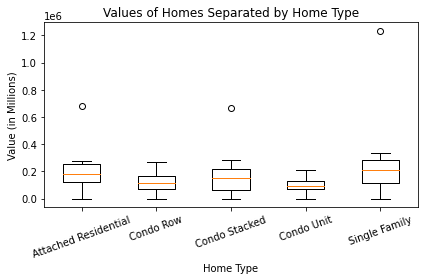

In [22]:
labels = ["Attached Residential", "Condo Row", "Condo Stacked", "Condo Unit", "Single Family"]
plt.boxplot(type_df, labels=labels)
plt.title("Values of Homes Separated by Home Type")
plt.xlabel("Home Type")
plt.ylabel("Value (in Millions)")
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig("home type boxplot")

In [85]:
#INPUT FLORIDA RESIDENT DATA, CONSOLIDATE COUNTIES, DROP UNNECESSARY PROPERTY TYPES
fl_csv = "FloridaResidents.csv"
fl_res_df = pd.read_csv(fl_csv)
fl_house_age = 2020 - fl_res_df["YearBuilt"]
fl_res_df["House Age"] = fl_house_age

fl_res_df["TypeOfResidence"] = fl_res_df["TypeOfResidence"].replace({"STACKED CONDO" : "CONDO STACKED"})
fl_res_df["TypeOfResidence"] = fl_res_df["TypeOfResidence"].replace({"ROW CONDO" : "CONDO ROW"})
fl_res_df["TypeOfResidence"] = fl_res_df["TypeOfResidence"].replace({"UNIT CONDO" : "CONDO UNIT"})
fl_res_df["TypeOfResidence"] = fl_res_df["TypeOfResidence"].replace({"ATTACHED RESDENTIAL" : "ATTACHED RESIDENTIAL"})
fl_res_df

# fl_res_df.drop(labels=, 1) =="MISCELLANEOUS RESIDENTIAL"


county = ["BROWARD", "MANATEE", "PINELLAS", "BREVARD", "MIAMI-DADE", "PALM BEACH", "SARASOTA", "CHARLOTTE", 
          "DUVAL", "COLLIER", "LEE", "SEMINOLE", "MARION", "VOLUSIA", "SAINT JOHNS", "BAY", "HILLSBOROUGH", 
          "ALACHUA", "INDIAN RIVER", "ESCAMBIA", "NASSAU", "ORANGE", "MONROE"]

fl_res_df=fl_res_df[fl_res_df.CountyName.isin(county)]
fl_res_df

# for row in county:
#     fl_res_df.loc(fl_res_df["CountyName"] == row)

delete = ["MISCELLANEOUS RESIDENTIAL", "AGRICULTURE", "CONDO DETACHED",
          "VACANT", "COMMERCIAL", "OTHER", "MANUFACTURED HOME", "APARTMENT UNIT"]
for residence in delete:
    fl_res_df = fl_res_df[fl_res_df["TypeOfResidence"] != residence]


In [118]:
#drop home values < 1.3 million
fl_res_df["ValueofHome"].dtypes
fl_res_df["ValueofHome"] = fl_res_df["ValueofHome"].astype(int)
fl_res_df["ValueofHome"].dtypes
fl_res_df=fl_res_df.loc[(fl_res_df["ValueofHome"]<=1300000), :]
fl_res_df

,Id,OwnerCity,OwnerState,PropertyLocationStreet1,PropertyCity,CountyName,PropertyZip,StateParcelId,ParcelSize,ValueofHome,...,DistancetoFireDepartment,DistancetoSinkhole,SinkholeLatitude,SinkholeLongitude,LocationWindSpeed,WindborneDebrisRegion,Terrain,FloodZone,FloodZoneRiskLevel,House Age
0,12086db272d757be6,MIAMI,FL,5934 NW 7 PL,MIAMI,MIAMI-DADE,33127,C23-000-198-3578-4,4880.0,164994,...,0.98,9.56,25.96256,-80.16641,146.0,True,HVHZ,A:100,NaN,16.0
1,12057c35a22b0865c,TAMPA,FL,5713 PALM RIVER RD,TAMPA,HILLSBOROUGH,33619,C39-000-406-3313-3,16913.0,200346,...,0.05,0.82,27.94389,-82.37694,120.0,True,B,A:100,NaN,15.0
2,12057cf31f8e69893,TAMPA,FL,1805 MAGDALENE MANOR DR,TAMPA,HILLSBOROUGH,33613,C39-000-389-2623-4,27374.0,364161,...,1.69,0.39,28.08028,-82.47806,120.0,True,B,"A:60, X:40",NaN,36.0
3,12057c5b7712cfb0b,RIVERVIEW,FL,7405 ALAFIA RIDGE LP,RIVERVIEW,HILLSBOROUGH,33569,C39-000-414-6909-9,43883.0,138691,...,1.37,1.09,27.89053,-82.29201,120.0,True,B,"X:80, X500:20",NaN,34.0
4,12057a9d507819528,BRANDON,FL,1715 CINNABAR CT,BRANDON,HILLSBOROUGH,33510,C39-000-411-1518-9,5515.0,104365,...,1.54,1.14,27.98883,-82.30555,120.0,True,B,X:100,NaN,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53999,120865661a78fa3c8,MIAMI,FL,9221 NW 17 AVE,MIAMI,MIAMI-DADE,33147,C23-000-240-0005-1,8250.0,114432,...,0.57,8.07,25.96256,-80.16641,146.0,True,HVHZ,X:100,NaN,71.0
54000,1200980de660f371c,MELBOURNE,FL,1199 HOUSTON ST,MELBOURNE,BREVARD,32935,C15-001-090-5145-8,10890.0,119690,...,0.52,25.42,28.46383,-80.79177,120.0,True,C,X:100,NaN,64.0
54001,1208698914968668a,CORAL GABLES,FL,3715 HARLANO ST,CORAL GABLES,MIAMI-DADE,33134,C23-000-211-7828-0,7875.0,539553,...,0.66,16.74,25.96256,-80.16641,146.0,True,HVHZ,X:100,NaN,81.0
54002,120117d9876b67325,HOLLYWOOD,FL,714 N 32 AVE,HOLLYWOOD,BROWARD,33021,C16-000-116-3292-4,6502.0,194190,...,0.49,1.97,25.99000,-80.18329,140.0,True,HVHZ,X500:100,NaN,64.0


In [119]:
fl_house_type = fl_res_df["TypeOfResidence"].value_counts()
fl_house_type_df = pd.DataFrame(fl_house_type)
fl_house_type_df

,TypeOfResidence
SINGLE FAMILY,43187
ATTACHED RESIDENTIAL,3389
CONDO STACKED,2356
CONDO ROW,651
CONDO UNIT,282


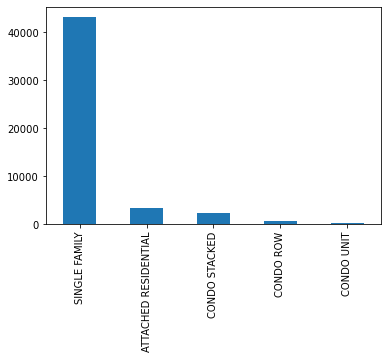

In [120]:
fl_house_type.plot(kind="bar", x="TypeOfResidence", y=fl_house_type)

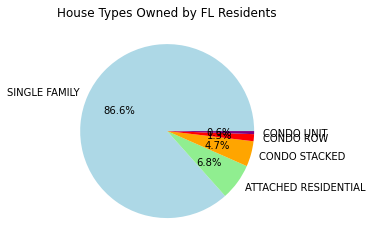

In [136]:
fl_colors=["lightblue", "lightgreen", "orange", "red", "purple"]
fl_labels=fl_house_type_df["TypeOfResidence"].index
plt.pie(fl_house_type, labels=fl_labels, autopct="%1.1f%%", colors=fl_colors)
plt.title("House Types Owned by FL Residents")
plt.tight_layout
plt.savefig("florida house type pie chart")

Text(0, 0.5, 'Value (in Millions)')

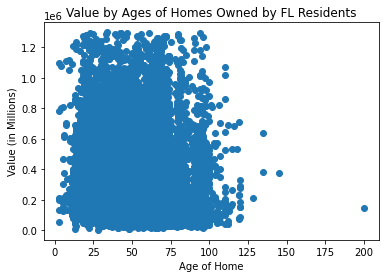

In [122]:
fl_hx = fl_res_df["House Age"]
fl_hy = fl_res_df["ValueofHome"]
plt.scatter(fl_hx, fl_hy)

plt.title("Value by Ages of Homes Owned by FL Residents")
plt.xlabel("Age of Home")
plt.ylabel("Value (in Millions)")

In [125]:
np.polyfit(fl_hx, fl_hy, 1)

(slope, intercept, rvalue, pvalue, stderr) = linregress(fl_hx, fl_hy)
slope, intercept

fl_house_predict = fl_hx*slope + intercept
fl_house_predict

fl_line_eq = f"y = {round(slope)}x + {round(intercept)}"
fl_r_val = pearsonr(fl_hx, fl_hy)[0]
fl_r_sq =  fl_r_val ** 2

Text(120, 1050000, 'R-squared: 0.0014698383846899284')

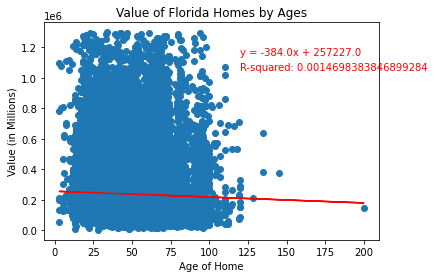

In [130]:
fl_hx = fl_res_df["House Age"]
fl_hy = fl_res_df["ValueofHome"]
plt.scatter(fl_hx, fl_hy)
plt.plot(fl_hx, fl_house_predict, color="red")

plt.title("Value of Florida Homes by Ages")
plt.xlabel("Age of Home")
plt.ylabel("Value (in Millions)")
plt.tight_layout

plt.annotate(line_eq, (120,1150000), color="red")
plt.annotate(f"R-squared: {r_sq}", (120,1050000), color="red")